In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import os
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define useful functions

In [2]:
def get_data_from_folder(mypath): #returns list of all file-names that are stored in folder "mypath"
    liste = []
    for path in os.listdir(mypath):
        full_path = os.path.join(mypath, path)
        if os.path.isfile(full_path):
            liste.append(full_path)
    return liste

#the elements of the returned list can be used as input "name" for fct "get_data_from_state" 

def get_data_from_state_1st(name, state): #returns numbers of "state" from file "name"
    df = pd.read_csv(name)
    index = df.index[df['country_name'] == state]
    liste = df.iloc[index[0]].tolist()
    liste = liste[3:]
    return liste

def get_time_1st(name): #returns array of dates
    df = pd.read_csv(name)
    liste = df.columns.tolist()
    liste = liste[3:]
    return liste

def search_for_index(name, String): #returns row-index of position of string in excel-file
    book = xlrd.open_workbook(name)
    for sheet in book.sheets():
        for rowidx in range(sheet.nrows):
            row = sheet.row(rowidx)
            for colidx, cell in enumerate(row):
                if cell.value == String :
                    #print(sheet.name, rowidx, colidx)
                    return rowidx
                
def clean_list(name,sheet): #delete first "row_idx" rows of df and remove nans and letters (since table has entries a,b,c,...)
    df = pd.read_excel(name, sheet_name = sheet)
    row_idx = search_for_index(name,"TIME") #BE CAREFUL: Not always searcj for "TIME" (depends on file)
    #print(row_idx)
    df = df.tail(len(df) - row_idx + 1) #delete first index rows of df. first row of neu starts with TIME
    new_list = []
    for i in range(0,len(df)):
        test = df.iloc[i].tolist()
        neu = [x for x in test if str(x) !='nan' and str(x)!='p']
        #neu = neu.reshape(1,-1)
        new_list.append(neu)
        new_df = pd.DataFrame(new_list)
    return new_df
         
def get_data_from_state_2nd(name, sheet, state): #returns data of state "state" from sheet "sheet" of file with name "name"
    df = pd.read_excel(name, sheet_name = sheet)
    df = clean_list(name, sheet)
    index = df.index[df[0] == state]
    liste = df.iloc[index[0]].tolist()
    liste = liste[1:]
    return liste

def get_all_data_2nd(name, sheet): #just for 2020_Q1 until 2021_Q2
    df = pd.read_excel(name, sheet_name = sheet)
    df = clean_list(name, sheet)
    l = np.arange(4,38)
    liste = [df.iloc[x].tolist()[13:][:-1] for x in l]
    return liste

def reduce_restrictions(a): #reduce data of over 500 restrictions to 5 for 5 quarters (2020_Q1 until 2021_Q2)
    q1 = round(np.mean(a[0:91]),1)
    q2 = round(np.mean(a[91:182]),1)
    q3 = round(np.mean(a[182:274]),1)
    q4 = round(np.mean(a[274:366]),1)
    q5 = round(np.mean(a[366:456]),1)
    liste = [q1,q2,q3,q4,q5]
    return liste

#get_all_restrictions(liste1,countries)

def get_all_restrictions(features,countries):
    final_list = [] 
    for c in np.arange(0,len(countries)): #features consists of 16 features (policies/restrictions)
        a = []
        for f in np.arange(0,len(features)):
            restriction = reduce_restrictions(get_data_from_state_1st(liste1[f], countries[c])[:-125])
            a = np.concatenate([a, restriction]) #for 2D: a = np.concatenate([a, restriction]), for 3D: a.append(restriction)
        final_list.append(a) 
    return final_list #31x16x5 array with 16 features for 31 countries for 5 quaters  

# 1st data source: Government policies

In [3]:
#1st data source: https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker
#every datafile is from 01.01.2020 until 03.08.2021
#for more explanation: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md 

mypath = r'C:\Users\User\Desktop\AML\FinalProject\MyCode\timeseries\Policies'
liste1 = get_data_from_folder(mypath)
print(len(liste1))
#print(liste1)

15


In [4]:
#data visualization example:


print("liste1[0]: school closing:",liste1[0])
time = get_time_1st(liste1[0])
fig = plt.figure(figsize=(10,8))
plt.plot(time,c1) 
x_ticks = np.arange(0, len(time), 91) #fit x-ticks to quarters
plt.xticks(x_ticks)
fig.autofmt_xdate() #fixes timestamps on x-axis
plt.hlines(y=3, xmin=0, xmax=len(time), linestyles="dashed", color="purple", label="require closing all levels")
plt.hlines(y=2, xmin=0, xmax=len(time), linestyles="dashed", color="red", label="require closing (only some levels)")
plt.hlines(y=1, xmin=0, xmax=len(time), linestyles="dashed", color="yellow", label="recommend closing")
plt.hlines(y=0, xmin=0, xmax=len(time), linestyles="dashed", color="green", label="no closings")
plt.title("school closing (c1) in germany over time as en example")
plt.legend()
#0:no measures, 1: recommend not to travel between regions/cities, 2:internal movement restrictions in place
plt.show()

liste1[0]: school closing: C:\Users\User\Desktop\AML\FinalProject\MyCode\timeseries\Policies\c1_school_closing.csv


NameError: name 'c1' is not defined

<Figure size 720x576 with 0 Axes>

# 2nd data source: Economic information 

In [5]:
#2nd data source: https://ec.europa.eu/eurostat/web/covid-19/data (here: just data from "Economy")
#most excel files consist of mutiple sheets. be careful: each sheet has different informations
#contains information from european countries

mypath =  r'C:\Users\User\Desktop\AML\FinalProject\Data\2nd_datasource\Quarterly'
liste2 = get_data_from_folder(mypath)
GDP = liste2[5]
print(GDP)

C:\Users\User\Desktop\AML\FinalProject\Data\2nd_datasource\Quarterly\GDP_growth_quarterly.xlsx


liste2[5]: GDP: C:\Users\User\Desktop\AML\FinalProject\Data\2nd_datasource\Quarterly\GDP_growth_quarterly.xlsx 

Timestamps: ['2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2'] 

GDP_growth_quarterly in Germany: [1.2, 0.8, 0.9, 0.8, -0.4, 0.6, -0.4, 0.4, 1.1, -0.5, 0.4, -0.1, -1.8, -10, 9, 0.7, -2.1, 1.5] 



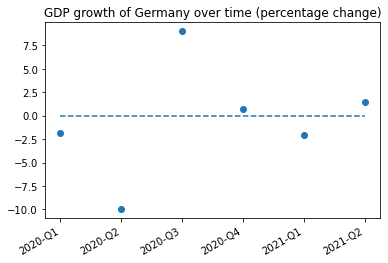

NameError: name 'c7' is not defined

<Figure size 432x288 with 0 Axes>

In [6]:
#data visualization example:

print("liste2[5]: GDP:",liste2[5], "\n")

time = get_data_from_state_2nd(GDP, "Sheet 2", "TIME")
GDP_germany = get_data_from_state_2nd(GDP, "Sheet 2", "Germany (until 1990 former territory of the FRG)")
#[:-5] filters out nan and None values although get_data_from_state_2nd has str(x)!='nan'
print("Timestamps:", time, "\n")
print("GDP_growth_quarterly in Germany:", GDP_germany, "\n") #percentage change on previous period

time_start=time[12:]
GDP_germany_start=GDP_germany[12:]

fig = plt.figure()
plt.scatter(time_start, GDP_germany_start)
plt.hlines(y=0, xmin=0, xmax=len(time_start)-1, linestyles="dashed")
plt.title("GDP growth of Germany over time (percentage change)")
fig.autofmt_xdate() #fixes timestamps on x-axis
plt.show()

time = get_time_1st(liste1[6])[:-34]
fig = plt.figure()
plt.scatter(time,c7[:-34]) 
x_ticks = np.arange(0, len(time), 91) #fit x-ticks to quarters
plt.xticks(x_ticks)
fig.autofmt_xdate() #fixes timestamps on x-axis
plt.hlines(y=2, xmin=0, xmax=len(time), linestyles="dashed", color="red", label="internal movement restrictions in place")
plt.hlines(y=1, xmin=0, xmax=len(time), linestyles="dashed", color="yellow", label="recommend not to travel between regions/cities")
plt.hlines(y=0, xmin=0, xmax=len(time), linestyles="dashed", color="green", label="no restrictions")
plt.title("movement restrictions (c7) in germany over time as en example")
plt.legend(loc=(1.04,0.4))
plt.show()

# GP model

In [7]:
#Economy dataset:

GDP_of_countries = get_all_data_2nd(GDP, "Sheet 2") #all countries of table except for Albania, UK, Turkey and Iceland
del(GDP_of_countries[33])
del(GDP_of_countries[31])
del(GDP_of_countries[30])
del(GDP_of_countries[27])
print(np.shape(GDP_of_countries))
#print(GDP_of_countries)

(30, 5)


In [8]:
#Policy dataset:

time_policies = get_time_1st(liste1[6])[:-125] #547 elements. starts with 01Jan2020, ends with 31.03.2021
#[:-125] so it ends on Q1 of 2021 (31.03.2021)

countries = ["Belgium","Bulgaria","Czech Republic","Denmark","Germany","Estonia",
            "Ireland","Greece","Spain","France","Croatia","Italy","Cyprus",
             "Latvia","Lithuania","Luxembourg","Hungary","Malta","Netherlands",
             "Austria","Poland","Portugal","Romania","Slovenia","Slovak Republic",
             "Finland","Sweden","Norway","Switzerland","Serbia"] #turkey removed because of nan in h7

all_restrictions = get_all_restrictions(liste1,countries)
print(np.shape(all_restrictions))
#80=16*5, 75=15*5
#all_restrictions has dim=(30)x(80=5*16)

(30, 75)


In [15]:
#Time: 2020_Q1 until 2021_Q1
#X (feature vector): 30x16x547 -> 30x(16x5) (30 countries)x(16 feature values for each quarter)(5 quaters)
#X:  (n_samples)x(n_features)
#only problem: GP algorithm does not know that first 5 out of 80/75 features are same restriction
#Y (target-vector): 30x5 (30 countries)x(5 GDP growth for each quarter)
#Y: (n_samples)x(n_targets)

X = all_restrictions
Y = GDP_of_countries
print(X)
print("TEST")
print(Y)

print("Target vector Y:",np.shape(Y), "= (30 countries)x(5 GDP growth values for each quarter from 2020_Q1 to 2021_Q1)")
#print("Target vector: ",Y, "\n")
print("Feature vector X:",np.shape(X), "= (30 countries)x(15 features for each of 5 GDP growth values)", "\n")
#print("Feature vector: ", X, "\n")

kernel = RBF()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=5, alpha = 0.5).fit(X, Y)
print("Score of GP:",gpr.score(X, Y))
print(gpr.log_marginal_likelihood())
print(gpr.get_params())

gpr1 = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=5, alpha = 0.2).fit(X, Y)
print("Score of GP:",gpr1.score(X, Y))
gpr2 = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=5, alpha = 0.4).fit(X, Y)
print("Score of GP:",gpr2.score(X, Y))
gpr3 = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=5, alpha = 0.6).fit(X, Y)
print("Score of GP:",gpr3.score(X, Y))
gpr4 = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=5, alpha = 0.8).fit(X, Y)
print("Score of GP:",gpr4.score(X, Y))

#How to choose a good alpha?

[array([0.4, 2. , 1. , 1.2, 1.1, 0.6, 2.4, 2. , 2.3, 2. , 0.4, 2. , 2. ,
       1.7, 2. , 0.6, 3.7, 3.7, 4. , 4. , 0. , 0. , 0. , 0. , 0. , 0.4,
       1.5, 0.2, 0. , 0. , 0.7, 3.4, 3. , 3. , 3.7, 0.6, 2. , 2. , 1.9,
       2. , 0.3, 2. , 1.2, 1.8, 1.1, 1.4, 2. , 2. , 2. , 2. , 0.3, 1.6,
       2. , 2. , 2. , 0.6, 1.5, 2. , 2. , 2. , 0. , 1.4, 2.7, 3. , 3. ,
       0. , 0. , 0. , 0. , 1.8, 0.5, 2. , 2. , 2. , 2. ]), array([0.8, 2.5, 1.8, 1.7, 2.1, 0.2, 1. , 1. , 1.8, 2.1, 0.4, 1.6, 1. ,
       1.4, 2. , 0.8, 3.2, 1.6, 2.4, 3. , 0. , 0. , 0. , 0. , 0. , 0.3,
       0.8, 0. , 0. , 0. , 1. , 3. , 2.9, 3. , 2.9, 0. , 2. , 2. , 1.9,
       2. , 0. , 1.6, 1. , 1.1, 1. , 1. , 2. , 2. , 2. , 2. , 0.3, 1. ,
       1. , 1. , 1. , 0. , 1.4, 2. , 2. , 2. , 0. , 1.5, 2. , 2.8, 3. ,
       0. , 0. , 0. , 0.1, 3.3, 0.4, 0.4, 0. , 0. , 0.4]), array([0.7, 2.1, 1. , 2.3, 3. , 0.6, 1.8, 1. , 1.6, 2. , 0.5, 1.6, 1. ,
       1. , 1.8, 0.8, 2.8, 1.4, 3.9, 4. , 0. , 0.1, 0. , 0. , 0.7, 0.4,
       0. , 1. , 